In [2]:
#import imageio
import numpy as np
from math import sqrt
import sys
import argparse
import os

In [3]:
def get_fish_xn_yn(source_x, source_y, radius, distortion):
    """
    Get normalized x, y pixel coordinates from the original image and return normalized 
    x, y pixel coordinates in the destination fished image.
    :param distortion: Amount in which to move pixels from/to center.
    As distortion grows, pixels will be moved further from the center, and vice versa.
    """

    if 1 - distortion*(radius**2) == 0:
        return source_x, source_y

    return source_x / (1 - (distortion*(radius**2))), source_y / (1 - (distortion*(radius**2)))

In [4]:
def fish(img, distortion_coefficient):
    """
    :type img: numpy.ndarray
    :param distortion_coefficient: The amount of distortion to apply.
    :return: numpy.ndarray - the image with applied effect.
    """

    # If input image is only BW or RGB convert it to RGBA
    # So that output 'frame' can be transparent.
    w, h = img.shape[0], img.shape[1]
    if len(img.shape) == 2:
        # Duplicate the one BW channel twice to create Black and White
        # RGB image (For each pixel, the 3 channels have the same value)
        bw_channel = np.copy(img)
        img = np.dstack((img, bw_channel))
        img = np.dstack((img, bw_channel))
    if len(img.shape) == 3 and img.shape[2] == 3:
        print("RGB to RGBA")
        img = np.dstack((img, np.full((w, h), 255)))

    # prepare array for dst image
    dstimg = np.zeros_like(img)

    # floats for calcultions
    w, h = float(w), float(h)

    # easier calcultion if we traverse x, y in dst image
    for x in range(len(dstimg)):
        for y in range(len(dstimg[x])):

            # normalize x and y to be in interval of [-1, 1]
            xnd, ynd = float((2*x - w)/w), float((2*y - h)/h)

            # get xn and yn distance from normalized center
            rd = sqrt(xnd**2 + ynd**2)

            # new normalized pixel coordinates
            xdu, ydu = get_fish_xn_yn(xnd, ynd, rd, distortion_coefficient)

            # convert the normalized distorted xdn and ydn back to image pixels
            xu, yu = int(((xdu + 1)*w)/2), int(((ydu + 1)*h)/2)

            # if new pixel is in bounds copy from source pixel to destination pixel
            if 0 <= xu and xu < img.shape[0] and 0 <= yu and yu < img.shape[1]:
                dstimg[x][y] = img[xu][yu]

    return dstimg.astype(np.uint8)

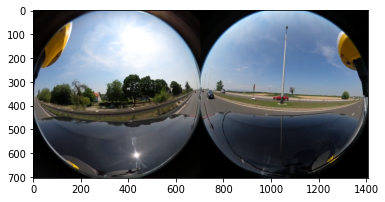

In [5]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('test.png', 'r').convert('RGBA')
imshow(np.asarray(pil_im))

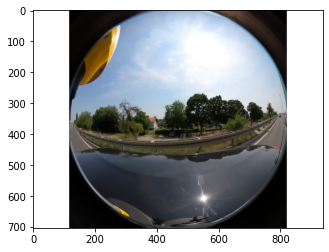

In [6]:
import math

np_im = np.asarray(pil_im)

h_org, w_org = np_im.shape[:2]

# Crop image
image_arr = np_im[0:h_org, 0:w_org//2]

n_channels = 4
transparent_img1 = np.zeros((h_org, 2*w_org//3, n_channels), dtype=np.uint8)
  
# padding_x
bpx = w_org//12

transparent_img1[0:h_org, bpx:(bpx+w_org//2)] = image_arr

transparent_img1[transparent_img1 < 0] = 0
transparent_img1[transparent_img1 > 255] = 255

imshow(transparent_img1)

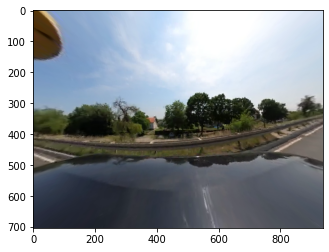

In [7]:
deFish1 = fish(transparent_img1, -0.5)
imshow(deFish1)

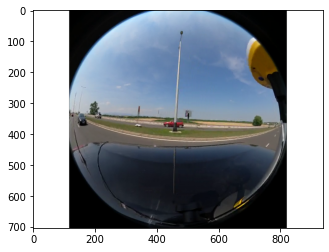

In [8]:
import math

# Crop image
image_arr2 = np_im[0:h_org, (w_org//2):w_org]

n_channels = 4
transparent_img2 = np.zeros((h_org, 2*w_org//3, n_channels), dtype=np.uint8)

transparent_img2[0:h_org, bpx:(bpx+w_org//2)] = image_arr2

transparent_img2[transparent_img2 < 0] = 0
transparent_img2[transparent_img2 > 255] = 255

imshow(transparent_img2)

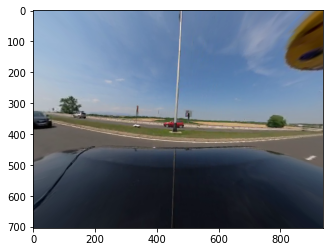

In [9]:
deFish2 = fish(transparent_img2, -0.5)
imshow(deFish2)

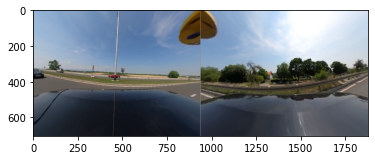

In [10]:
import math

n_channels = 4
transparent = np.zeros((h_org, 4*w_org//3, n_channels), dtype=np.uint8)

transparent[0:h_org, 0:(2*w_org//3)] = deFish2
transparent[0:h_org, (2*w_org//3+1):(4*w_org//3)] = deFish1

transparent[transparent < 0] = 0
transparent[transparent > 255] = 255

imshow(transparent)